In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
sns.set(style='whitegrid')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

from sklearn.metrics import r2_score,confusion_matrix,classification_report

from collections import defaultdict, Counter

import re
import gensim

import string
from tqdm import tqdm 


from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Dropout
from keras.models import Sequential

from keras.initializers import Constant

import tensorflow as tf
import warnings
warnings.simplefilter('ignore')


In [3]:
df_train=pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip',sep='\t')
df_test=pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip',sep='\t')

In [4]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
df_train.shape,df_test.shape

((156060, 4), (66292, 3))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
df_train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

<AxesSubplot:ylabel='Sentiment'>

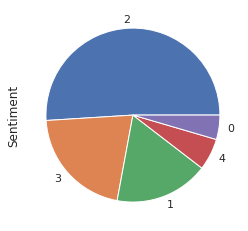

In [8]:
df_train.Sentiment.value_counts().plot(kind='pie')

(array([1867., 1955.,  992., 1064.,  572.,  745.,  422.,  493.,  247.,
         269.,  204.,   88.,  131.,   55.,   42.,   20.,   20.,   12.,
           4.,    4.]),
 array([ 1.  ,  3.55,  6.1 ,  8.65, 11.2 , 13.75, 16.3 , 18.85, 21.4 ,
        23.95, 26.5 , 29.05, 31.6 , 34.15, 36.7 , 39.25, 41.8 , 44.35,
        46.9 , 49.45, 52.  ]),
 <BarContainer object of 20 artists>)

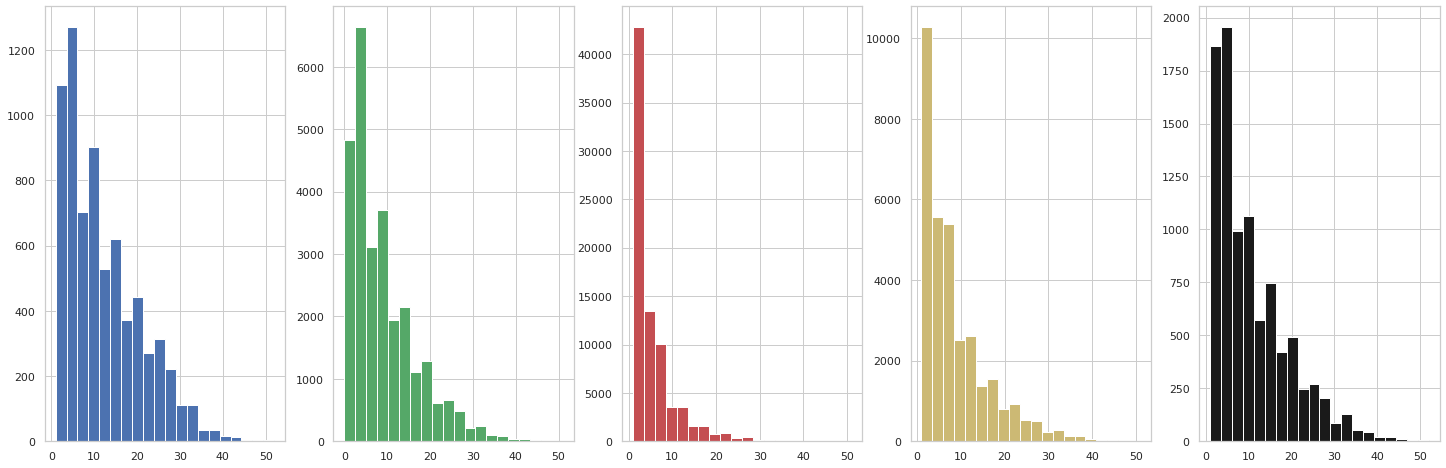

In [9]:
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(25,8))
ax1.hist(df_train[df_train['Sentiment']==0]['Phrase'].str.split().map(lambda x:len(x)), bins=20,color='b')
ax2.hist(df_train[df_train['Sentiment']==1]['Phrase'].str.split().map(lambda x:len(x)), bins=20,color='g')
ax3.hist(df_train[df_train['Sentiment']==2]['Phrase'].str.split().map(lambda x:len(x)), bins=20,color='r')
ax4.hist(df_train[df_train['Sentiment']==3]['Phrase'].str.split().map(lambda x:len(x)), bins=20,color='y')
ax5.hist(df_train[df_train['Sentiment']==4]['Phrase'].str.split().map(lambda x:len(x)), bins=20,color='k')

In [10]:
print(df_train.loc[df_train['Phrase'].str.split().map(lambda x:len(x))>=20].shape)
print(df_train.loc[df_train['Phrase'].str.split().map(lambda x:len(x))>=10].shape)
print(df_train.loc[df_train['Phrase'].str.split().map(lambda x:len(x))>=30].shape)
print(df_train.loc[df_train['Phrase'].str.split().map(lambda x:len(x))>=40].shape)
print(df_train.loc[df_train['Phrase'].str.split().map(lambda x:len(x))>=50].shape)


(11494, 4)
(39540, 4)
(2568, 4)
(352, 4)
(18, 4)


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.utils import to_categorical



In [12]:
data=df_train[['Phrase','Sentiment']]
data['Sentiment_label']=pd.Categorical(data['Sentiment'])

In [13]:
data['Sentiment']=data['Sentiment_label'].cat.codes

In [14]:
data_train,data_val=train_test_split(data,test_size=0.2)

In [15]:
from transformers import TFBertModel, BertConfig, BertTokenizerFast
model_name='bert-base-uncased'
max_length=45




In [16]:
config=BertConfig.from_pretrained(model_name)
config

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [17]:
tokenizer=BertTokenizerFast.from_pretrained(pretrained_model_name_or_path=model_name,config=config)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [18]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [19]:
tf_bert_model=TFBertModel.from_pretrained(pretrained_model_name_or_path=model_name,config=config)
tf_bert_model

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

2022-09-16 20:57:04.203715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 20:57:04.204820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 20:57:04.205573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 20:57:04.206447: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
#main layer
bert=tf_bert_model.layers[0]
#input layers
input_ids=Input(shape=(max_length,),name='inputs',dtype='int32')
inputs={'input_ids':input_ids}
#load model


In [21]:
bert_model=bert(inputs)[1]
dropout=Dropout(config.hidden_dropout_prob,name='pooled_dropout')
pooled_output=dropout(bert_model,training=False)

sentiments=Dense(units=len(df_train.Sentiment.value_counts()),kernel_initializer=TruncatedNormal(stddev=config.initializer_range),name='sentiment')(pooled_output)
outputs={'Sentiments':sentiments}

model=Model(inputs=inputs,outputs=outputs,name='BERT_Multiclass')

In [22]:
model.summary()

Model: "BERT_Multiclass"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 45)]              0         
_________________________________________________________________
bert (TFBertMainLayer)       TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
pooled_dropout (Dropout)     (None, 768)               0         
_________________________________________________________________
sentiment (Dense)            (None, 5)                 3845      
Total params: 109,486,085
Trainable params: 109,486,085
Non-trainable params: 0
_________________________________________________________________


In [23]:
#optimizer
optimizer=Adam(learning_rate=5e-05,epsilon=1e-08,decay=0.01,clipnorm=1.0)
loss={'Sentiment':CategoricalCrossentropy(from_logits=True)}
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [24]:
y_train=to_categorical(data_train['Sentiment'])
X_train=tokenizer(
    text=data_train['Phrase'].to_list(),
    max_length=max_length,
    return_attention_mask=True,
    return_token_type_ids=False,truncation=True,padding=True,return_tensors='tf',add_special_tokens=True,verbose=True
)

In [25]:
y_val = to_categorical(data_val['Sentiment'])

x_val = tokenizer(
          text=data_val['Phrase'].to_list(),
          add_special_tokens=True,
          max_length=max_length,
          truncation=True,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

In [26]:
history=model.fit(
x={'input_ids':X_train['input_ids']},y=y_train,
validation_data=({'input_ids':x_val['input_ids']},y_val),
batch_size=64, epochs=2,verbose=1)

2022-09-16 20:57:27.240861: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1951/1951 [==============================] - 765s 383ms/step - loss: 0.8107 - accuracy: 0.6651 - val_loss: 0.7428 - val_accuracy: 0.6891
Epoch 2/2
1951/1951 [==============================] - 742s 381ms/step - loss: 0.7114 - accuracy: 0.7056 - val_loss: 0.7328 - val_accuracy: 0.6945


In [27]:
model_eval = model.evaluate(
    x={'input_ids': x_val['input_ids']},
    y={'Sentiment': y_val}
)

976/976 [==============================] - 75s 74ms/step - loss: 0.7328 - accuracy: 0.6945
